In [1]:
from covid import Covid

In [2]:
covid19 = Covid(source="john_hopkins")

In [21]:
import pandas as pd

covid_19_df = pd.DataFrame(covid19.get_data())
covid_19_df.sort_values(by="latitude")

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
198,6,Antarctica,11,None,0,None,-71.9499,23.3470,1678454462000
44,130,New Zealand,2236114,None,2550,None,-40.9006,174.8860,1678454462000
14,8,Argentina,10044957,None,130472,None,-38.4161,-63.6167,1678454462000
26,37,Chile,5192286,None,64273,None,-35.6751,-71.5430,1678454462000
68,192,Uruguay,1034303,None,7617,None,-32.5228,-55.7658,1678454462000
...,...,...,...,...,...,...,...,...,...
9,148,Russia,22086064,None,388521,None,61.5240,105.3188,1678454462000
54,63,Finland,1463644,None,8967,None,61.9241,25.7482,1678454462000
112,80,Iceland,209137,None,263,None,64.9631,-19.0208,1678454462000
195,50,Diamond Princess,712,None,13,None,NaN,NaN,1678454462000


In [4]:
sorted_data = covid_19_df.sort_values(by=["confirmed"], ascending=False)
top_10 = sorted_data.head(10)
top_10

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,187,US,103804263,None,1123836,None,40.000000,-100.000000,1678454462000
1,81,India,44690738,None,530779,None,20.593684,78.962880,1678454462000
2,64,France,39866718,None,166176,None,46.227600,2.213700,1678454462000
3,68,Germany,38249060,None,168935,None,51.165691,10.451526,1678454462000
4,25,Brazil,37085675,None,699310,None,-14.235000,-51.925300,1678454462000
5,89,Japan,33329551,None,73046,None,36.204824,138.252924,1678454462000
6,95,"Korea, South",30615522,None,34093,None,35.907757,127.766922,1678454462000
7,87,Italy,25603510,None,188322,None,41.871900,12.567400,1678454462000
8,191,United Kingdom,24658705,None,220721,None,55.000000,-3.000000,1678454462000
9,148,Russia,22086064,None,388521,None,61.524000,105.318800,1678454462000


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


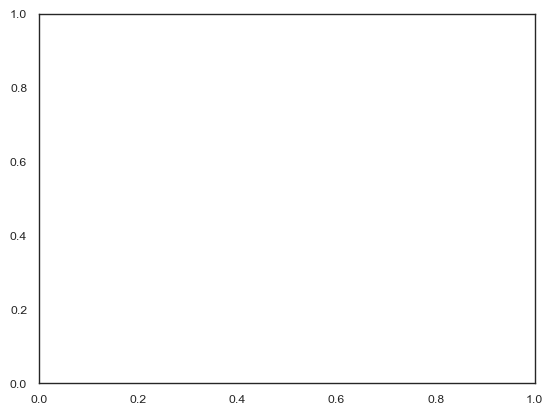

In [15]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 1, 1, 0)},context='paper')
fig, ax = plt.subplots(1,1)

c:\Users\Franklin\Desktop\local_repos\data-science\data_env\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Franklin\Desktop\local_repos\data-science\data_env\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Franklin\Desktop\local_repos\data-science\data_env\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Franklin\Desktop\local_repos\data-science\data_env\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height

,x,g
0,64.038123,A
1,66.147050,B
2,66.370011,C
3,68.791019,D
4,70.583534,E
...,...,...
495,69.358022,F
496,72.212877,G
497,70.474247,H
498,73.251022,I


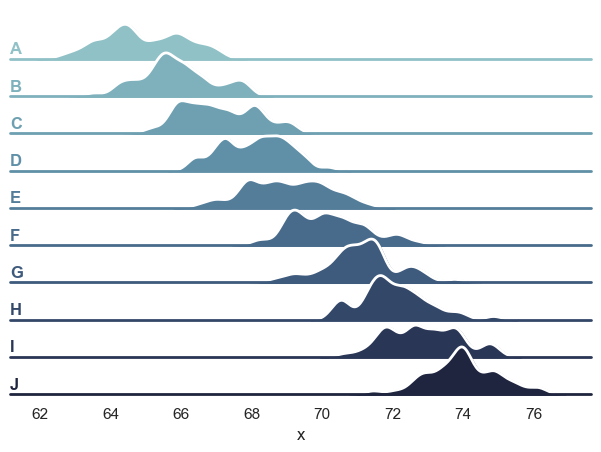

In [22]:

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False, 
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)
g.set_titles("Passengers per flight")

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
df